# Setup

set working directory to guitarist-net and add to path

In [1]:
%cd /content/drive/Othercomputers/My MacBook Pro/guitarist-net

/content/drive/Othercomputers/My MacBook Pro/guitarist-net


install requirements

In [2]:
!pip install -r requirements.txt &> /dev/null

imports

In [3]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import librosa
import librosa.display
from plot_listen.listen import play
from plot_listen.plot import plot, plot_single_string_item
from save_load import load_weights_from_file
from util import torch_to_numpy
from globals import *
from data.single_string_dataset import SingleStringDataset
from ddsp.ddsp_mono_synth import DDSPMonoSynth
from ddsp.sweetcocoa_loudness_extractor import LoudnessExtractor

# Load Datasets

get datasets

In [4]:
train_dataset = SingleStringDataset("train_player-not00_solo_e-string.npz")

UPDATED
Sum of sliced_windowed_signal: -3984.91845703125
Sum of SLICED_SIGNAL: 0.00032806396484375
sweetcocoa loudness extracted.
shape: (457, 1000)


# Input Loudness Extraction in Data

set index

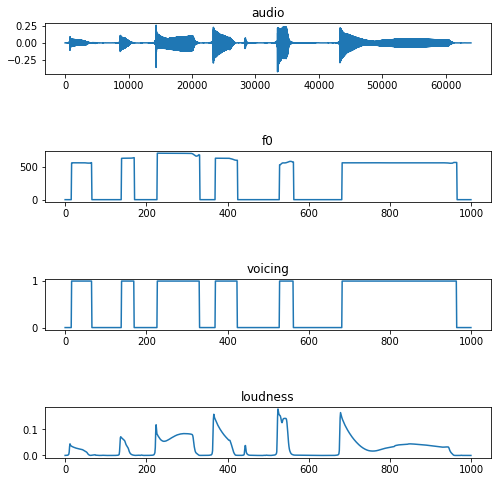

In [12]:
idx = 209
input_data = train_dataset[idx]
plot_single_string_item(input_data)

In [6]:
total_loud = 0
for i, elem in enumerate(train_dataset):
    loud = elem["loudness"].sum()
    total_loud += loud
print(total_loud)

11230.254840254784


# Load Loudness Extractor Module

In [7]:
loud_ex = LoudnessExtractor(sr=SR, frame_length=HOP_LENGTH)

Feed audio through extractor

In [8]:
audio_batch = torch.tensor(train_dataset.audio[:32]).to(DEVICE)
loud_batch = loud_ex(audio_batch)
print(loud_batch.shape)

UPDATED
Sum of sliced_windowed_signal: -205.8524169921875
Sum of SLICED_SIGNAL: -0.0001157522201538086
torch.Size([32, 1000])


# Load Trained Model

create model

In [9]:
# synth = DDSPMonoSynth()

load weights

In [10]:
# synth.load_state_dict(load_weights_from_file())